In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor as KNR
from matplotlib import pyplot as plt

In [2]:
x = np.sort(np.random.normal(size=100))

f = lambda x: np.sin(x) + x**3 - np.log(x**2 + 0.02)

y = f(x) + np.random.normal(scale=1, size=100)
x = x.reshape(-1, 1)

K = lambda x, w: np.exp(-x**2/w**2)

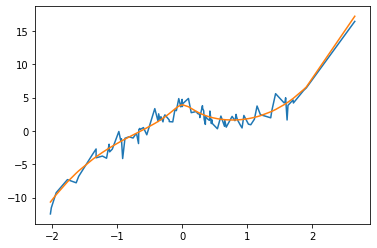

In [3]:
plt.plot(x, y)
plt.plot(x, f(x))

In [70]:
knr = KNR(n_neighbors = 5, weights = lambda x: K(x,1))
knr.fit(x.reshape(-1,1), y)

KNeighborsRegressor(weights=<function <lambda> at 0x133d52e50>)

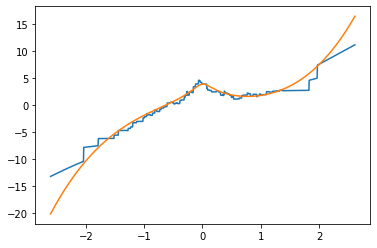

In [71]:
z = np.linspace(x.min(), x.max(), 1000).reshape(-1,1)
preds = knr.predict(z)
plt.plot(z, preds)
plt.plot(z, f(z))

### Splines

In [4]:
import requests
import pandas as pd
import io
from statsmodels.gam.smooth_basis import BSplines

df = requests.get('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data').content
df=pd.read_csv(io.StringIO(df.decode('utf-8'))).drop('row.names', 1)

In [2]:
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [66]:
splines = BSplines(df[['tobacco','ldl']], [6,6], [4,4]) #x, no. of basis functions, degree

In [73]:
splines.penalty_matrices[0].shape

(5, 5)

In [70]:
from inspect import getmembers
getmembers(splines)

[('__abstractmethods__', frozenset()),
 ('__class__', statsmodels.gam.smooth_basis.BSplines),
 ('__delattr__',
  <method-wrapper '__delattr__' of BSplines object at 0x11f8c0a60>),
 ('__dict__',
  {'degrees': [4, 4],
   'dfs': [6, 6],
   'knot_kwds': None,
   'constraints': None,
   'x': array([[0.000e+00, 2.820e+00],
          [0.000e+00, 9.800e-01],
          [7.500e+00, 7.210e+00],
          [3.040e+00, 4.800e+00],
          [4.250e+00, 8.220e+00],
          [0.000e+00, 5.470e+00],
          [7.200e-01, 4.040e+00],
          [1.200e+00, 3.980e+00],
          [6.000e+00, 3.300e+00],
          [3.150e+00, 4.370e+00],
          [0.000e+00, 4.660e+00],
          [2.610e+00, 2.720e+00],
          [0.000e+00, 3.100e+00],
          [5.160e+00, 4.900e+00],
          [3.000e-02, 4.210e+00],
          [0.000e+00, 4.970e+00],
          [7.280e+00, 3.560e+00],
          [3.400e+00, 4.870e+00],
          [1.550e+01, 5.050e+00],
          [2.520e+00, 3.950e+00],
          [9.000e-01, 3.180e+00],
 

In [32]:
splines.basis.shape

(462, 10)

In [60]:
splines.transform(df[['tobacco','ldl']].values)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.13669591e-01, 3.54625052e-02, 6.32285952e-05],
       [4.46175765e-01, 6.77275433e-03, 4.32197694e-05, ...,
        1.13467825e-01, 1.06936299e-02, 0.00000000e+00],
       [7.13098955e-01, 2.54603970e-01, 3.09836640e-02, ...,
        1.28510994e-01, 1.33015976e-02, 5.55257264e-11],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.07792392e-01, 9.79092247e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81777484e-01, 2.54806939e-02, 1.07986988e-05],
       [8.01936193e-01, 1.83665450e-01, 1.40400087e-02, ...,
        1.75416013e-01, 2.37532578e-02, 6.74157450e-06]])

In [24]:
f = foo()

In [26]:
f.fit(1,1)

calling fit foo
calling fit parent


3

In [40]:
isinstance(6,int)

True

In [62]:
type(df)

pandas.core.frame.DataFrame

In [84]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.gam.smooth_basis import BSplines
from pandas.core.frame import DataFrame, Series

class SplineLogisticRegression(LogisticRegression):
    
    def __init__(self, df, degree, *args, **kwargs):
        self.df = df
        self.degree = degree
        super().__init__(*args, **kwargs)
        
    def fit(self, X, y):
        
        n_features = X.shape[1]
        self.Xmin = X.min(0)
        self.Xmax = X.max(0)
        
        if isinstance(self.df, int):
            self.df = n_features*[self.df]
            
        if isinstance(self.degree, int):
            self.degree = n_features*[self.degree]
        
        self.splines = BSplines(X, self.df, self.degree)
        super().fit(self.splines.basis, y)
        
    def predict(self, X):
        
        if isinstance(X, DataFrame):
            X = X.values
            
        if isinstance(self.Xmin, Series):
            self.Xmin = self.Xmin.values
            self.Xmax = self.Xmax.values
            
        X = np.clip(X, self.Xmin, self.Xmax)
        
        return super().predict(self.splines.transform(X))

In [85]:
df = df.sample(frac=1.0)
df_tr = df[:-len(df)//5]
df_vld = df[-len(df)//5:]

sr = SplineLogisticRegression(5, 3)
sr.fit(df_tr[['tobacco','ldl']], df_tr['chd'])
sr.predict(df_vld[['tobacco','ldl']])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
#kernel approach:
#hard-core approach: try polynomials, combinations, polynomial kernels